In [26]:
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from collections import Counter

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import graphviz

In [50]:
data = pd.read_csv("../Dataset/afterPCA.csv",low_memory=False)
data.drop(['Unnamed: 0'],axis=1, inplace=True)
data.shape

(150773, 42)

In [28]:
y=data['case_status']
data1=data.drop(['case_status',],axis=1)
X=data1
Counter(y)

Counter({0: 5021, 1: 145752})

## Splitting into testing and training and oversampling '0's

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2)

In [30]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_resampled).items()))

[(0, 116587), (1, 116587)]


In [31]:
X_train = X_resampled
y_train= y_resampled

In [32]:
print('Train samples count')
a = [i for i in y_train if i==0]
print('0',len(a))
print('1',len(y_train)-len(a))

print('\nTest samples count')
a = [i for i in y_test1 if i==0]
print('0',len(a))
print('1',len(y_train1)-len(a))

Train samples count
0 116587
1 116587

Test samples count
0 990
1 119628


## Neural Networks

In [33]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=X_train.shape[1], units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 30,verbose=1)

Epoch 1/30
233174/233174 [==============================] - 5s 21us/step - loss: 0.6047 - acc: 0.6712
Epoch 2/30
233174/233174 [==============================] - 5s 20us/step - loss: 0.5804 - acc: 0.6976
Epoch 3/30
233174/233174 [==============================] - 5s 23us/step - loss: 0.5698 - acc: 0.7028
Epoch 4/30
233174/233174 [==============================] - 5s 20us/step - loss: 0.5651 - acc: 0.7019
Epoch 5/30
233174/233174 [==============================] - 5s 20us/step - loss: 0.5613 - acc: 0.7026
Epoch 6/30
233174/233174 [==============================] - 5s 23us/step - loss: 0.5593 - acc: 0.7020
Epoch 7/30
233174/233174 [==============================] - 5s 22us/step - loss: 0.5569 - acc: 0.7031
Epoch 8/30
233174/233174 [==============================] - 4s 19us/step - loss: 0.5554 - acc: 0.7033
Epoch 9/30
233174/233174 [==============================] - 6s 25us/step - loss: 0.5545 - acc: 0.7040
Epoch 10/30
233174/233174 [==============================] - 5s 21us/step - loss: 

In [34]:
score= classifier.evaluate(X_test1,y_test1)
print(score)

30155/30155 [==============================] - 1s 21us/step
[0.5576377825740162, 0.5015751948326584]


In [35]:
y_pred=classifier.predict(X_test1)
tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round()).ravel()
print(tp/(tp+ fn))
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fmeasure = 2*((precision*recall)/(precision+recall))
acc = (tp+tn)/(tp+tn+fp+fn)
rej = tn/(tn+fp)

0.4877078690210869


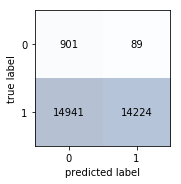

In [36]:
binary = confusion_matrix(y_test1,y_pred.round())
fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.savefig('nn.png')
plt.show()

In [37]:
def plotCurve(y_test1,y_pred,name):   
    fpr, tpr, thresholds = metrics.roc_curve(y_test1, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    name = '../Graphs/'+name+'.png'
    plt.savefig(name)
    plt.show()
    return roc_auc

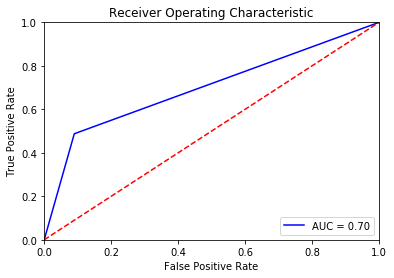

In [38]:
auc = plotCurve(y_test1,y_pred.round(),'nn-aoc')

In [39]:
modellist=[]
modellist.append(['Neural Networks', round(precision,2), round(recall,2), round(fmeasure,2), round(acc,2),round(rej,2),round(auc,2)])
modellist

[['Neural Networks', 0.99, 0.49, 0.65, 0.5, 0.91, 0.7]]

### does not predict everything as '1'

In [40]:
l=len([i for i in y_pred.round() if i==0])
l

15842

## Other Models

In [41]:
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
#models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Trees', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
#models.append(('Support Vector Machine', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


608 382 7145 22020
[[  608   382]
 [ 7145 22020]]


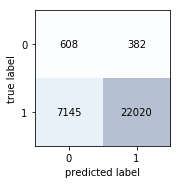

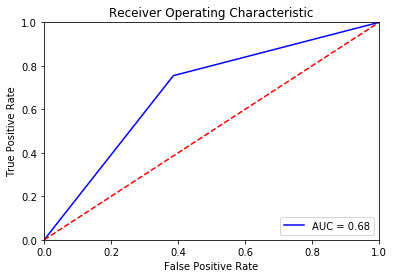

['Logistic Regression', 0.98, 0.76, 0.86, 0.75, 0.61, 0.68]


341 649 1961 27204
[[  341   649]
 [ 1961 27204]]


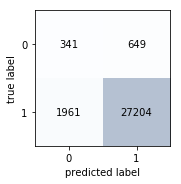

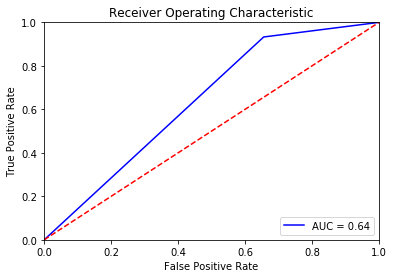

['K Nearest Neighbours', 0.98, 0.93, 0.95, 0.91, 0.34, 0.64]


214 776 779 28386
[[  214   776]
 [  779 28386]]


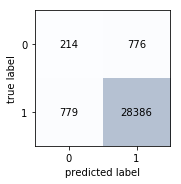

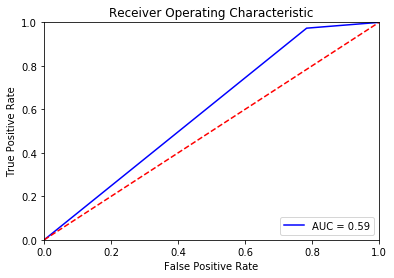

['Decision Trees', 0.97, 0.97, 0.97, 0.95, 0.22, 0.59]


850 140 22119 7046
[[  850   140]
 [22119  7046]]


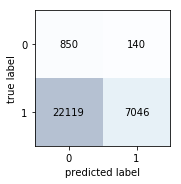

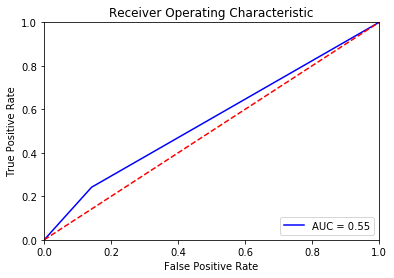

['Naive Bayes', 0.98, 0.24, 0.39, 0.26, 0.86, 0.55]




In [42]:
#from pandas_ml import ConfusionMatrix

for name, model in models:
    try:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test1)
       # print(y_pred)
        cv_results = round(model.score(X_test1,y_test1),2)
        tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round()).ravel()
        print(tn, fp, fn, tp)
        precision = round(tp/(tp+fp),2)
        recall = round(tp/(tp+fn),2)
        fmeasure = round(2*((precision*recall)/(precision+recall)),2)
        rej = tn/(tn+fp)
        print(confusion_matrix(y_test1,y_pred.round()))
        binary = confusion_matrix(y_test1,y_pred.round())
        fig, ax = plot_confusion_matrix(conf_mat=binary)
        plt.show()
        n = '../Graphs/'+name+'.png'
        plt.savefig(n)
        auc = plotCurve(y_test1,y_pred.round(),name+'-aoc')
        msg = [name, precision, recall, fmeasure, cv_results,round(rej,2),round(auc,2)]
        modellist.append(msg)
        print(msg)
        print('\n')
    except:
        print("Error:" ,name)


In [43]:
df = pd.DataFrame(modellist)
df.columns=['Model','Precision','Recall','f-measure','Accuracy','Rejection Rate','Auc']

In [44]:
df

,Model,Precision,Recall,f-measure,Accuracy,Rejection Rate,Auc
0,Neural Networks,0.99,0.49,0.65,0.50,0.91,0.70
1,Logistic Regression,0.98,0.76,0.86,0.75,0.61,0.68
2,K Nearest Neighbours,0.98,0.93,0.95,0.91,0.34,0.64
3,Decision Trees,0.97,0.97,0.97,0.95,0.22,0.59
4,Naive Bayes,0.98,0.24,0.39,0.26,0.86,0.55


In [45]:
df_test = df

# Validation Accuracy 

In [46]:
modellist=[]
for name, model in models:
    try:
        scores = cross_val_score(model, X,y, cv=5)
        names.append(name)
        msg = [name, round(scores.mean(),2),scores.std()]
        modellist.append(msg)
        print(msg)
    except:
        print("Error: ",name)

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

['Logistic Regression', 0.97, 0.0004840813561637596]
['K Nearest Neighbours', 0.95, 0.016459693562429437]
['Decision Trees', 0.89, 0.06541789111796126]
['Naive Bayes', 0.48, 0.04343031769273104]


In [47]:
df = pd.DataFrame(modellist)
df.columns=['Model','Mean Validation Score','Std Dev of validation score']
df_validation = df

In [48]:
df_validation

,Model,Mean Validation Score,Std Dev of validation score
0,Logistic Regression,0.97,0.000484
1,K Nearest Neighbours,0.95,0.016460
2,Decision Trees,0.89,0.065418
3,Naive Bayes,0.48,0.043430


In [49]:
df_test

,Model,Precision,Recall,f-measure,Accuracy,Rejection Rate,Auc
0,Neural Networks,0.99,0.49,0.65,0.50,0.91,0.70
1,Logistic Regression,0.98,0.76,0.86,0.75,0.61,0.68
2,K Nearest Neighbours,0.98,0.93,0.95,0.91,0.34,0.64
3,Decision Trees,0.97,0.97,0.97,0.95,0.22,0.59
4,Naive Bayes,0.98,0.24,0.39,0.26,0.86,0.55
